# Draft code for homework 3
...because it's easier to mess around in a Jupyter notebook than in a python script!


# TODO:
* condition & stability lectures
* condition & stability reading
* see if you need to change anything to code for 1-3!
* check w/Billy? --> does it look reasonable?
* make python script and rerun code/plots/matrices
* type up explanations in latex
* submit!!!


In [4]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy import io


In [5]:
main_dir = '/Users/jmnugent/Documents/__Year_3_2020-2021/AMATH_584-Numerical_Linear_Algebra/Homework/python/'
save_dir = main_dir + 'amath584/hw3_qr_factorization/'


In [6]:
# Save the random matrices so you can import into matlab?
SAVE_MATS = False 

# Save the figures?
SAVE_FIGS = True


# 1. QR decomposition

## Develop a numerical algorithm that implements the modified Gram-Schmidt orthogonalization procedure

Helpful link: 
    https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.html

# TODO: Check interpretation/that your comments are correct...

In [4]:
def gram_schmidt(A):
    """
    Perform QR decomposition on input matrix A using
    the modified Gram-Schmidt orthogonalization procedure;
    gives the reduced form of the QR factorization of A.

    Input: matrix A (numpy array)
    Returns: matrices Q, R (numpy arrays)                                       
    """
    m, n = np.shape(A)
    Q = np.zeros(np.shape(A))
    R = np.zeros((n, n))

    # initialize V from A - this will make
    # q1 = direction of a1
    V = A.copy()
    
    # iterate through each column
    for i in range(0, n):
        # normalize vi to get qi
        R[i, i] = np.linalg.norm(V[:, i])
        Q[:, i] = V[:, i] / R[i, i]

        # recursively project all the pieces out
        for j in range(i, n):
            # projection of jth vector onto the ith direction
            R[i, j] = np.conj(Q[:, i]).T @ V[:, j]
            
            # subtract the vector that's orthogonal to that projection
            V[:, j] = V[:, j] - R[i, j]*Q[:, i]


    return Q, R


## (b) Compare your algorithm to

* the **qrfactor.m** code that we built in class (you can download it from the third lecture on QR on the website)
    
* MATLAB’s **QR algorithm** on a variety of matrices to see how well your algorithm work
    
Be sure to try it on a matrix that is ill-conditions, i.e. cond(A) ≫ 1.

### some functions to check 

In [67]:
def check_orthonormal(Q, rel_tol=1e-9, abs_tol=1e-9):
    """
    Quick check if a columns of a matrix Q form an 
    orthonormal basis.
    
    Prints statement on if Q is orthonormal.
    """
    orthonorm = True
    
    # loop through pairs of columns
    for i in range(np.shape(Q)[1]):
        dot = Q[:, i] @ Q[:, i-1]
        norm = np.linalg.norm(Q[:, i-1])
        
        # check columns mutually orthogonal
        if not math.isclose(dot, 0, abs_tol=abs_tol):
            print('Q is NOT orthonormal: for at least one pair of columns, dot product = {d} =/= 0'.format(d=dot))
            orthonorm=False
            break
            
        # check columns have norm 1
        if not math.isclose(norm, 1, rel_tol=rel_tol):
            print('Q is NOT orthonormal: for at least one column, norm = {n} =/= 1'.format(n=norm))
            orthonorm = False
            break
        
    if orthonorm:
        print('Q is orthonormal')


In [60]:
def check_size(A, Q, R):
    """
    Check the size of matrices Q and R from the QR 
    factorization of A.
    
    Prints statement on if Q and R have correct sizes
    """
    m, n = np.shape(A)
    
    if np.shape(A) == np.shape(Q):
        qsize = 'Q is the correct size'
    else:
        qsize = 'Q is NOT the correct size'
        
    if np.shape(R) != (n, n):
        rsize = 'R is NOT the correct size'
    else:
        rsize = 'R is the correct size'
    
    print(qsize + ' and ' + rsize)
    

### Set up some matrices to test

In [61]:
# doing this randomly... any need for better structure??
m = 70
n = 10

# square
A_sq = np.random.randn(m, m)
print('Matrix of size {s} with cond(A) = {c}'.format(s=A_sq.shape, c=np.round(np.linalg.cond(A_sq), 1)))

# tall and skinny small
A_ts1 = np.random.randn(m, n)
print('Matrix of size {s} with cond(A) = {c}'.format(s=A_ts1.shape, c=np.round(np.linalg.cond(A_ts1), 1)))


# VERY tall and skinny
A_ts2 = np.random.randn(m*10, n)
print('Matrix of size {s} with cond(A) = {c}'.format(s=A_ts2.shape, c=np.round(np.linalg.cond(A_ts2), 1)))


# ill-conditioned matrix
A_ic = np.ones((m, n))
for i in range(m):
    for j in range(n):
        A_ic[i, j] = A_ic[i, j] + (1e-9)*random.randint(-1, 1)
print('Matrix of size {s} with cond(A) = {c}'.format(s=A_ic.shape, c=np.round(np.linalg.cond(A_ic), 1)))

# put them in a list
mat_list = [A_sq, A_ts1, A_ts2, A_ic]
mat_names = ['m{}'.format(x) for x in range(len(mat_list))]

if SAVE_MATS:
    io.savemat(save_dir + 'random_matrices.mat', mdict=dict(zip(mat_names, mat_list)))
    

Matrix of size (70, 70) with cond(A) = 155.7
Matrix of size (70, 10) with cond(A) = 2.1
Matrix of size (700, 10) with cond(A) = 1.2
Matrix of size (70, 10) with cond(A) = 5655132890.0


### Run the algorithm and compare:

#### your algorithm:

In [68]:
my_alg = [[]]*len(mat_list)

for i in range(len(mat_list)):
    Q, R = gram_schmidt(mat_list[i])
    my_alg[i] = Q @ R
    
    check_size(mat_list[i], Q, R)
    print('condition number of QR:', np.linalg.cond(my_alg[i]))
    diff = my_alg[i] - mat_list[i]
    print('norm of A - QR:'.format(i), np.linalg.norm(diff))
    check_orthonormal(Q)
    print('\n')



Q is the correct size and R is the correct size
condition number of QR: 155.69963745978768
norm of A - QR: 2.175794398113313e-14
Q is orthonormal


Q is the correct size and R is the correct size
condition number of QR: 2.1372619805345967
norm of A - QR: 5.5402760718170426e-15
Q is orthonormal


Q is the correct size and R is the correct size
condition number of QR: 1.2370910991470054
norm of A - QR: 3.9556818735964187e-14
Q is orthonormal


Q is the correct size and R is the correct size
condition number of QR: 5655132871.930781
norm of A - QR: 2.6202204231231423e-15
Q is NOT orthonormal: for at least one pair of columns, dot product = 2.611562100844622e-07 =/= 0




#### MATLAB script from class: DO IN MATLAB!

#### python's QR algorithm:
`Q, R = np.linalg.qr(A)`

In [69]:
python_alg = [[]]*len(mat_list)

for i in range(len(mat_list)):
    Q, R = np.linalg.qr(mat_list[i])
    python_alg[i] = Q @ R
    diff = python_alg[i] - mat_list[i]
    check_size(mat_list[i], Q, R)
    print('norm of A - QR:'.format(i), np.linalg.norm(diff))
    print('condition number of QR:', np.linalg.cond(python_alg[i]))
    check_orthonormal(Q)
    print('\n')


Q is the correct size and R is the correct size
norm of A - QR: 3.999883127707345e-14
condition number of QR: 155.69963745978944
Q is orthonormal


Q is the correct size and R is the correct size
norm of A - QR: 6.6206670858710816e-15
condition number of QR: 2.1372619805345976
Q is orthonormal


Q is the correct size and R is the correct size
norm of A - QR: 2.0258799806587262e-14
condition number of QR: 1.237091099147005
Q is orthonormal


Q is the correct size and R is the correct size
norm of A - QR: 8.50897408371397e-15
condition number of QR: 5655133155.351192
Q is orthonormal




# 2. Polynomial
Consider the polynomial 
$$ p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 -672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512 $$

* plot the polynomial $p(x)$ for $x \in \left[1.920, 2.080\right]$ for step-sizes of $\delta x = 0.001$ using the **right-hand side** of the expression above

* plot the polynomial again over the same interval using the **left-hand side** of the expression, i.e. $(x-9)^9$.


In [193]:
def plot_polynomial(func, x, ylim, title, filename, save_dir, 
                    save=False):
    """
    """
    y = func(x)
    
    plt.plot(x, func(x))
    plt.title(title)
    plt.ylim(ylim)
    
    if save:
        plt.savefig(save_dir + filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    

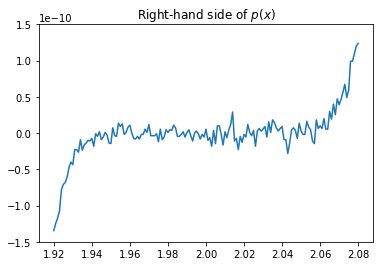

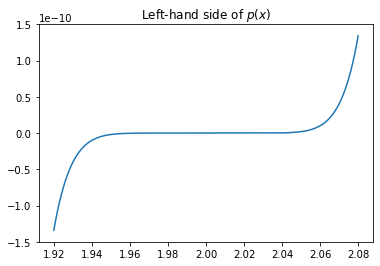

In [194]:
# polynomials:
p_rhs = lambda x: x**9 - 18*x**8 + 144*x**7 - 672*x**6 + 2016*x**5 - 4032*x**4 + 5376*x**3 - 4608*x**2 + 2304*x - 512
p_lhs = lambda x: (x-2)**9

# interval
dx = 0.001
xspan = np.arange(1.920, 2.080, dx)

# plots:
plot_polynomial(p_rhs, xspan, ylim=(-1.5e-10, 1.5e-10),
                title='Right-hand side of $p(x)$', filename='px_rhs.png',
                save_dir=save_dir, save=SAVE_FIGS)

plot_polynomial(p_lhs, xspan, ylim=(-1.5e-10, 1.5e-10),
                title='Left-hand side of $p(x)$', filename='px_lhs.png',
                save_dir=save_dir, save=SAVE_FIGS)


# 3. Consider the conditioning of a matrix:
(a) **Construct a random matrix** of size $m \times n$ where $m > n$, i.e. use $A = \text{randn}(m, n)$. **Study the condition number as a function of the size** of the matrix (increase the $m$ and $n$). 

In [34]:
# condition number as a function of size
condition_num = lambda m, n: np.linalg.cond(np.random.randn(m, n))

# get some values for m and n
ms = [int(x) for x in np.arange(1, 200)]
ns = [int(x) for x in np.arange(1, 100)]

# find the condition numbers for m > n
cs = np.zeros((len(ms), len(ns)))

for i in range(len(ms)):
    for j in range(len(ns)):
        m = ms[i]
        n = ns[j]
        if m == n:
            cs[i, j] = np.nan
        else:
            cs[i, j] = condition_num(m, n)


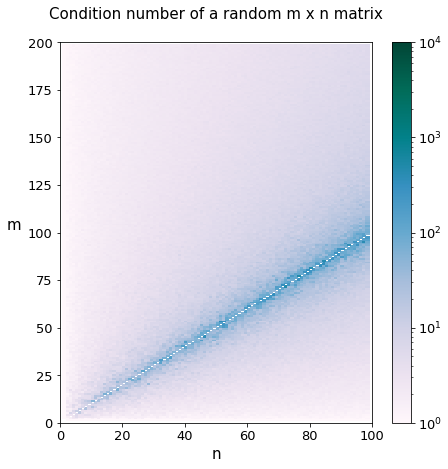

In [40]:
# plot
tsize = 15
fsize=13

fig, ax = plt.subplots(figsize=(7, 7))

pcm = ax.pcolormesh(ns, ms, cs, cmap='PuBuGn', norm=colors.LogNorm()) 
cb = fig.colorbar(pcm, ax=ax)
cb.ax.tick_params(labelsize=fsize)
pcm.set_clim((1, 1e4))

ax.set_ylim((0, 200))
ax.set_xlim((0, 100))
ax.tick_params(axis='both', labelsize=fsize)
ax.set_ylabel('m    ', rotation=0, fontsize=tsize)
ax.set_xlabel('n', fontsize=tsize)
ax.set_title('Condition number of a random m x n matrix\n', fontsize=tsize)

if SAVE_FIGS:
    plt.savefig(save_dir + 'condition_number_function.png', dpi=300, bbox_inches='tight')

plt.show()


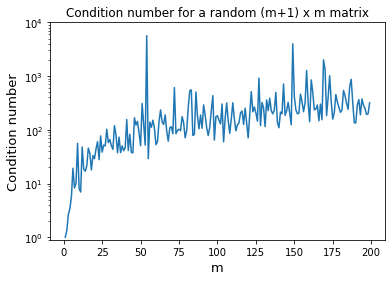

In [46]:
cs_psq = [condition_num(m+1, m) for m in ms]

plt.plot(ms, cs_psq)

plt.yscale('log')
plt.ylim(.9, 1e4)

plt.ylabel('Condition number', fontsize=fsize)
plt.xlabel('m', fontsize=fsize)
plt.title('Condition number for a random (m+1) x m matrix')

if SAVE_FIGS:
    plt.savefig(save_dir + 'cond_num_near_psq.png', dpi=300, bbox_inches='tight')

plt.show()


(b) For a fixed $m$ and $n$, copy the first column of A and append it as the $(n+1)$th column of A. **What is the condition number and determinant of the matrix?**

In [84]:
def det_cond(m, n):
    """
    Appends the first column of a random mxn matrix A
    as the (n+1)th column of A. Prints the appended 
    size, the condition number, and the determinant.
    
    Appends the first column to the end multiple times
    if m > n+1 (so that the matrix is square and a 
    determinant can be computed!)
    """
    A = np.random.randn(m, n)

    # first column of A
    col_n1 = np.reshape(A[:, 0], (m, 1))

    # append as the (n+1)th column of A
    if m == n+1:
        A = np.hstack((A, col_n1))
    else:
        for i in range(m-n):
            A = np.hstack((A, col_n1))
            
    print('Original size: {}'.format((m, n)))
    print('Appended size: {}'.format(np.shape(A)))
    print('Condition number: {}'.format(np.linalg.cond(A)))
    print('Determinant: {}'.format(np.linalg.det(A)))


In [88]:
# try it for a few values of m and n
ns = [10, 10, 10]
ms = [n+1, n+2, n*2]

for i in range(len(ms)):
    det_cond(ms[i], ns[i])
    print('\n')


Original size: (11, 10)
Appended size: (11, 11)
Condition number: 1.221367485620866e+16
Determinant: 3.8322290935126715e-13


Original size: (12, 10)
Appended size: (12, 12)
Condition number: 8.812665682449992e+16
Determinant: 0.0


Original size: (20, 10)
Appended size: (20, 20)
Condition number: 3.5044165882895423e+49
Determinant: 0.0




(c) Take the appended $(m+1)$th column and **add noise to it**, i.e. $a_{n+1} = a_{n+1} + \epsilon \text{ rand}(m, 1)$ and **see what happens to the condition number as a function of $\epsilon$.**

In [156]:
# condition number as a function of epsilon
def cond_eps(m, n, eps):
    """
    Returns the condition number for a random 
    mxn, m>n, matrix A and noise scale epsilon.
    """
    A = np.random.randn(m, n)
    cond_orig = np.linalg.cond(A)
    
    # first column of A
    col_n1 = np.reshape(A[:, 0], (m, 1))

    # append as the (n+1)th column of A
    A = np.hstack((A, col_n1))
    
    # add noise
    A[:, n] = A[:, n] + eps*np.random.randn(1, m) 
    
    return [cond_orig, np.linalg.cond(A)]


In [174]:
# look at some examples
m = 40
n = 10

eps = [10**float(exp) for exp in np.arange(-10, 1)]

print('random {m}x{n} matrix:'.format(m=m, n=n), '\n')
for i in range(len(eps)):
    co, ca = cond_eps(m, n, eps[i])
    print('epsilon = {e}:\n    {co} --> {ca}'.format(e=eps[i],
                                                     co=np.round(co, 1),
                                                     ca=np.round(ca, 1)))


random 40x10 matrix: 

epsilon = 1e-10:
    2.6 --> 23032928773.0
epsilon = 1e-09:
    2.9 --> 3362736858.8
epsilon = 1e-08:
    2.4 --> 258183455.9
epsilon = 1e-07:
    2.5 --> 26933729.8
epsilon = 1e-06:
    2.1 --> 2710989.6
epsilon = 1e-05:
    2.4 --> 266860.8
epsilon = 0.0001:
    2.5 --> 28206.8
epsilon = 0.001:
    2.5 --> 2698.4
epsilon = 0.01:
    2.3 --> 202.9
epsilon = 0.1:
    2.4 --> 36.7
epsilon = 1.0:
    2.3 --> 3.1


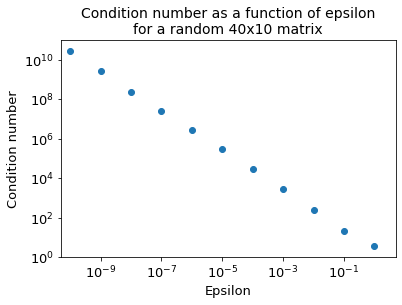

In [190]:
# find condition numbers
noisy_conds = [cond_eps(m, n, e)[1] for e in eps]

# plot
fig, ax = plt.subplots()

ax.scatter(eps, noisy_conds)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim((5e-11, 5))
ax.set_ylim((1, 1e11))

ax.tick_params(axis='both', labelsize=fsize)
ax.set_ylabel('Condition number', fontsize=fsize)
ax.set_xlabel('Epsilon', fontsize=fsize)
ax.set_title('Condition number as a function of epsilon\nfor a random {m}x{n} matrix'.format(m=m, n=n),
             fontsize=tsize-1)

if SAVE_FIGS:
    plt.savefig(save_dir + 'condn_func_of_eps.png', dpi=300, bbox_inches='tight')

plt.show()


# OLD

In [ ]:
# quick test it with a random matrix

A = np.random.randn(10, 4)
print(A, '\n')

Qact, Ract = np.linalg.qr(A)
print(Qact@Ract, '\n')

Q, R = gram_schmidt(A)
print(Q@R, '\n')

print(np.linalg.norm((Q@R)-(Qact@Ract)))


#### pythonize the other script

In [ ]:
def qrfactor(A):
    """
    Python version of the matlab script qrfactor.m
    
    Args:
        A (numpy array), matrix A
    
    Returns:
        Q, R (numpy arrays), matrices Q and R of the QR 
                             factorization of A
    """
    m, n = A.shape
    Q = np.identity(m)

    for k in range(0, n):
        
        # find the HH reflector
        z = np.reshape(A[k:m, k], (len(A[k:m]), 1))
        v1 = np.zeros(z.shape)
        v1[0] = -1*np.sign(z[0])*np.linalg.norm(z) - z[0]
        v1[1:] = -1*z[1:]        

        v = v1 / (np.sqrt(v1.T @ v1))
        
        # Apply the HH reflection to each column of A and Q
        for j in range(0, n):
            A[k:m, j] = A[k:m, j] - v @ ( 2*(v.T @ A[k:m, j]) )
            
        for j in range(0, m):
            Q[k:m, j] = Q[k:m, j] - v @ ( 2*(v.T @ Q[k:m, j]) )
            
    Q = Q.T
    R = np.triu(A)
    
    return [Q, R]


##### TESTING:
examples from https://www.geeksforgeeks.org/calculate-the-qr-decomposition-of-a-given-matrix-using-numpy/

In [ ]:
# square
# Create a numpy array   
arr = np.array([[5, 11, -15], [12, 34, -51],  
                [-24, -43, 92]], dtype=np.int32)  

# Find the QR factor of array  
q, r = np.linalg.qr(arr)  
print('\nQ:\n', q) 
print('\nR:\n', r) 

print('\n\n')

# Create a numpy array   
arr = np.array([[5, 11, -15], [12, 34, -51],  
                [-24, -43, 92]], dtype=np.int32)

# Find the QR factor of array  
q, r = qrfactor(arr)  
print('\nQ:\n', q) 
print('\nR:\n', r) 


In [ ]:
# tall & skinny

# Original matrix 
matrix1 = np.array([[1, 2, 3], [3, 4, 5]]) 
print(matrix1.T)

# Decomposition of the said matrix 
q, r = np.linalg.qr(matrix1.T) 
print('\nQ:\n', q) 
print('\nR:\n', r) 

print('\n\n')

# Original matrix 
matrix1 = np.array([[1, 2, 3], [3, 4, 5]]) 
print(matrix1.T)

# Decomposition of the said matrix 
q, r = qrfactor(matrix1.T) 
print('\nQ:\n', q) 
print('\nR:\n', r) 


In [ ]:
        # python equiv. of A / b is np.dot(A, np.linalg.pinv(b))
#         v = np.dot(v1, np.linalg.pinv(np.sqrt(v1.T @ v1)))